# Import model

In [2]:
import math
import imaplib
import email
import pandas as pd
import io
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
# 設定中文字型為微軟正黑體
mpl.rcParams['font.family'] = 'Microsoft JhengHei' 

# 記帳數據分析

## 函式

In [4]:
# 將日期轉換為datetime格式
def dateTodateformat(df):
    df['日期'] = pd.to_datetime(df['日期'], format='%Y%m%d')

    # 提取月份部分
    df['月份'] = df['日期'].dt.month
    return df

# 備註NaN轉無
def noteNanTonull(df):
    df['備註'] = df['備註'].fillna('無')
    return df

# 收支分割
def cost_income_split(df):
    cost = df[df['收支區分'] == '支']
    income = df[df['收支區分'] != '支']
    return cost, income

# 大類別
def big_categorysum(df):
    # pd.pivot_table(df, index = '大類別', columns = '類別', values = '金額', aggfunc = 'sum')
    return pd.pivot_table(df, index=['大類別', '類別'], values='金額', aggfunc = 'sum')

# 類別總和
def categorysum(df):
    return pd.pivot_table(df, index = ['類別'], values = ['金額'], aggfunc = 'sum')

# 類別排序
def categorysort(df):
    return df.groupby(['類別']).apply(lambda x: x.sort_values('金額', ascending = False))[['日期', '類別', '金額', '備註']]

# 月份類別金額總和
def monthcategorysum(df):
    return df.groupby(['月份', '類別']).agg({'金額': 'sum', '備註': 'first'})

# 月份金額總和
def monthsum(df):
    return df.groupby('月份')[['金額']].agg('sum')

In [5]:
dfcopy = df.copy()

# 刪除不必要的欄位
dfcopy.drop(['成員','上次更新'], axis = 1, inplace = True)

# 收支分離
cost, income = cost_income_split(dfcopy)

## 收入

In [ ]:
# data clean
# 篩選
income_selected = income[(income['類別'] == '加班費') | (income['備註'] == '加班費')]

# 將類別是'工資'的改成'加班費'，備註為NaN的也改成'加班費'
income_selected.loc[income_selected['類別'] == '工資', '類別'] = '加班費'
income_selected.loc[income_selected['備註'].isna(),  '備註'] = '加班費'

# 更新進去
income.update(income_selected)

# 備註
noteNanTonull(income)

# 個別修改
income.loc[1207,'備註'] = '薪水'
income.loc[[116,458],'備註'] = '季獎金'

In [ ]:
# 收入分析
categorysum(income)
categorysort(income)

### 類別收入圖表

In [ ]:
# 篩選
grouped = income.groupby('類別')
category_total = grouped['金額'].sum()

# 繪圖
fig, ax = plt.subplots(figsize = (10, 6))
bars = ax.bar(category_total.index, category_total.values)

# 圖標 & 標籤
y_max_range = (int(str(category_total.max())[0]) + 1) * 10 ** (int(math.log10(category_total.max())))
ax.set_title('Income by Category', fontweight = 'bold', fontsize = 16)
ax.set_xticklabels(category_total.index, fontsize = 14)
ax.set_ylabel('TWD',fontsize = 14, fontweight = 'bold')
ax.set_ylim(0, y_max_range)
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.2)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height, ha = 'center', va = 'bottom', fontsize = 12, fontweight = 'bold')

### 月份分類收入堆疊圖

In [ ]:
# 日期轉換
income = dateTodateformat(income)

In [ ]:
monthcategorysum(income)

In [ ]:
# 樞紐
monthly_total = pd.pivot_table(income, index='月份', values='金額', aggfunc='sum')
income_monthly = pd.pivot_table(income, index = '月份', columns = '類別', values = '金額', aggfunc = 'sum')

# bars
ax = income_monthly.plot(kind = 'bar', stacked = True, figsize = (10,6), linewidth = 0)

# 設定標題、標籤、格線
ax.set_title('Salary', fontsize = 16)
ax.set_xlabel('Month', fontsize = 14)
ax.set_ylabel('TWD', fontsize = 14)
ax.tick_params(axis = 'y', which = 'major', labelsize = 12, rotation = 45)
ax.tick_params(axis = 'x', which = 'major', labelsize = 12, rotation = 0)
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.2)

# 顯示圖例
ax.legend()

# 在每個bar上顯示月份的總金額
for idx, res in enumerate(ax.containers[0]):
    ax.text(res.get_x() + res.get_width() / 2, monthly_total.iloc[idx][0], monthly_total.iloc[idx][0], ha = 'center', va='bottom', fontsize = 12, fontweight='bold')

# 顯示圖表
plt.show()

## 支出

In [12]:
# 轉日期格式
cost = dateTodateformat(cost)

# 備註NaN轉無
cost = noteNanTonull(cost)

C:\Users\DAN\AppData\Local\Temp\ipykernel_4000\3993274059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['日期'] = pd.to_datetime(df['日期'], format='%Y%m%d')
C:\Users\DAN\AppData\Local\Temp\ipykernel_4000\3993274059.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['月份'] = df['日期'].dt.month
C:\Users\DAN\AppData\Local\Temp\ipykernel_4000\3993274059.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [13]:
# 大分類分析
big_categorysum(cost)
big_categorysum(cost).sum()

金額    106063
dtype: int64

### 月開銷圖

In [14]:
# 月開銷
monthly_grouped = monthsum(cost)

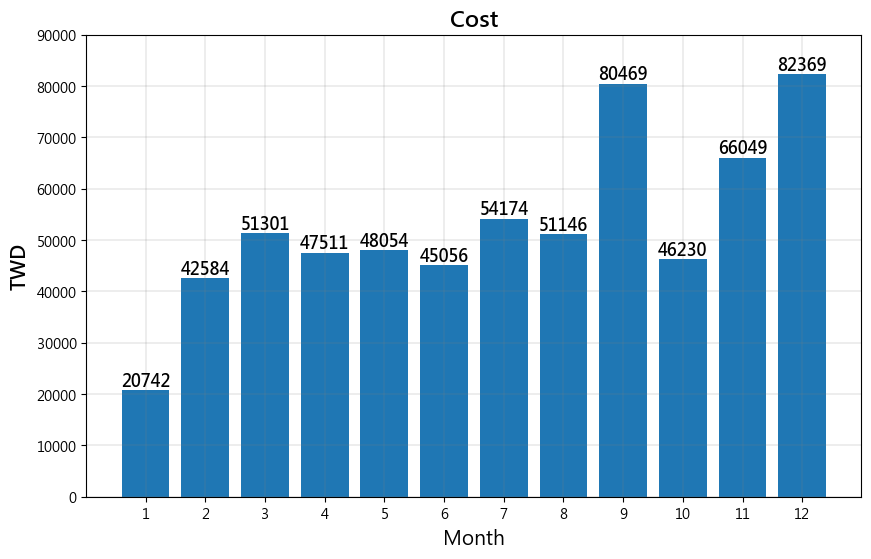

In [15]:
# 設置圖表大小
fig, ax = plt.subplots(figsize=(10, 6))
monthly_grouped = monthsum(cost)
bars = ax.bar(monthly_grouped.index, monthly_grouped['金額'])

# 設置 x 軸標籤和 y 軸標籤
y_max_range = (int(str(monthly_grouped['金額'].max())[0]) + 1) * 10 ** (int(math.log10(monthly_grouped['金額'].max())))
ax.set_title('Cost', fontweight = 'bold', fontsize = 16)
ax.set_xticks(range(1,13))
ax.set_xlabel('Month', fontsize = 14)
ax.set_ylabel('TWD', fontsize = 14, fontweight = 'bold')
ax.set_ylim(0, y_max_range)
ax.grid(color = 'gray', linewidth = 0.2)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height, ha = 'center', va = 'bottom', fontsize = 12, fontweight = 'bold')

# 顯示
plt.show()

### 按月類別分類支出棒圖

In [16]:
# 月份類別金額計算
pd.pivot_table(cost, index = '月份', columns = '類別', values = '金額', aggfunc = 'sum')

類別,Breakfast,Car,Clothes,Dinner,Drinks,Entertainment,Gas,Gift,Groceries,Hair,...,Mobile Bill,Motorcycle,Other,Shopping,Snack,Tax,Transportation,Travel,investment,轉帳手續費
月份,,,,,,,,,,,,,,,,,,,,,
1,484.0,NaN,2420.0,4872.0,446.0,740.0,400.0,4240.0,2238.0,150.0,...,589.0,450.0,NaN,349.0,495.0,NaN,NaN,NaN,NaN,NaN
2,771.0,NaN,1618.0,3836.0,192.0,4382.0,900.0,NaN,1462.0,NaN,...,NaN,13154.0,7500.0,3337.0,1303.0,830.0,777.0,NaN,NaN,NaN
3,1780.0,NaN,17626.0,7150.0,1467.0,240.0,500.0,NaN,94.0,100.0,...,1176.0,620.0,7563.0,4940.0,1628.0,NaN,NaN,NaN,4312.0,NaN
4,2002.0,NaN,12915.0,3338.0,634.0,7120.0,300.0,16.0,580.0,NaN,...,588.0,NaN,8000.0,6878.0,244.0,NaN,NaN,NaN,2907.0,NaN
5,1639.0,NaN,7243.0,2697.0,517.0,9467.0,301.0,851.0,NaN,NaN,...,588.0,450.0,8000.0,10992.0,260.0,NaN,310.0,NaN,1500.0,600.0
6,1973.0,NaN,12615.0,4486.0,730.0,2966.0,221.0,823.0,2820.0,NaN,...,588.0,40.0,8121.0,3367.0,1369.0,NaN,1180.0,NaN,NaN,600.0
7,374.0,NaN,2416.0,2349.0,642.0,330.0,600.0,NaN,2268.0,NaN,...,588.0,800.0,8000.0,12743.0,228.0,NaN,NaN,NaN,NaN,NaN
8,573.0,NaN,7775.0,3380.0,527.0,940.0,400.0,NaN,1040.0,NaN,...,588.0,NaN,8000.0,22227.0,947.0,NaN,310.0,NaN,NaN,NaN
9,1405.0,NaN,15785.0,5996.0,872.0,1250.0,650.0,1770.0,7925.0,NaN,...,588.0,350.0,8000.0,22017.0,156.0,NaN,2983.0,NaN,NaN,NaN


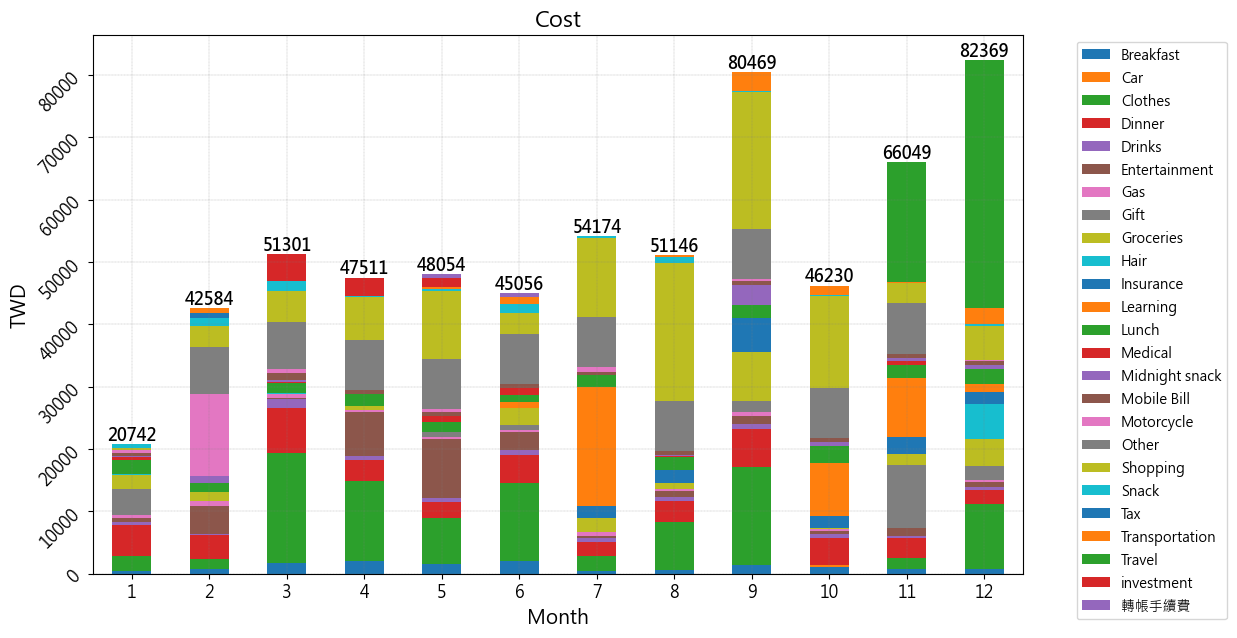

In [17]:
# 樞紐
monthly_total = pd.pivot_table(cost, index = '月份', values = '金額', aggfunc = 'sum')
cost_monthly = pd.pivot_table(cost, index = '月份', columns = '類別', values = '金額', aggfunc = 'sum')

# bars
ax = cost_monthly.plot(kind = 'bar', stacked = True, figsize = (12,7), linewidth = 0)

# 設定標題、標籤、格線
ax.set_title('Cost', fontsize = 16)
ax.set_xlabel('Month', fontsize = 14)
ax.set_ylabel('TWD', fontsize = 14)
ax.tick_params(axis = 'y', which = 'major', labelsize = 12, rotation = 45)
ax.tick_params(axis = 'x', which = 'major', labelsize = 12, rotation = 0)
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.2)

# 顯示圖例
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# 在每個bar上顯示月份的總金額
for idx, res in enumerate(ax.containers[0]):
    ax.text(res.get_x() + res.get_width() / 2, monthly_total.iloc[idx][0], monthly_total.iloc[idx][0], ha = 'center', va='bottom', fontsize = 12, fontweight='bold')

# 顯示圖表
plt.show()

### 月圓餅圖

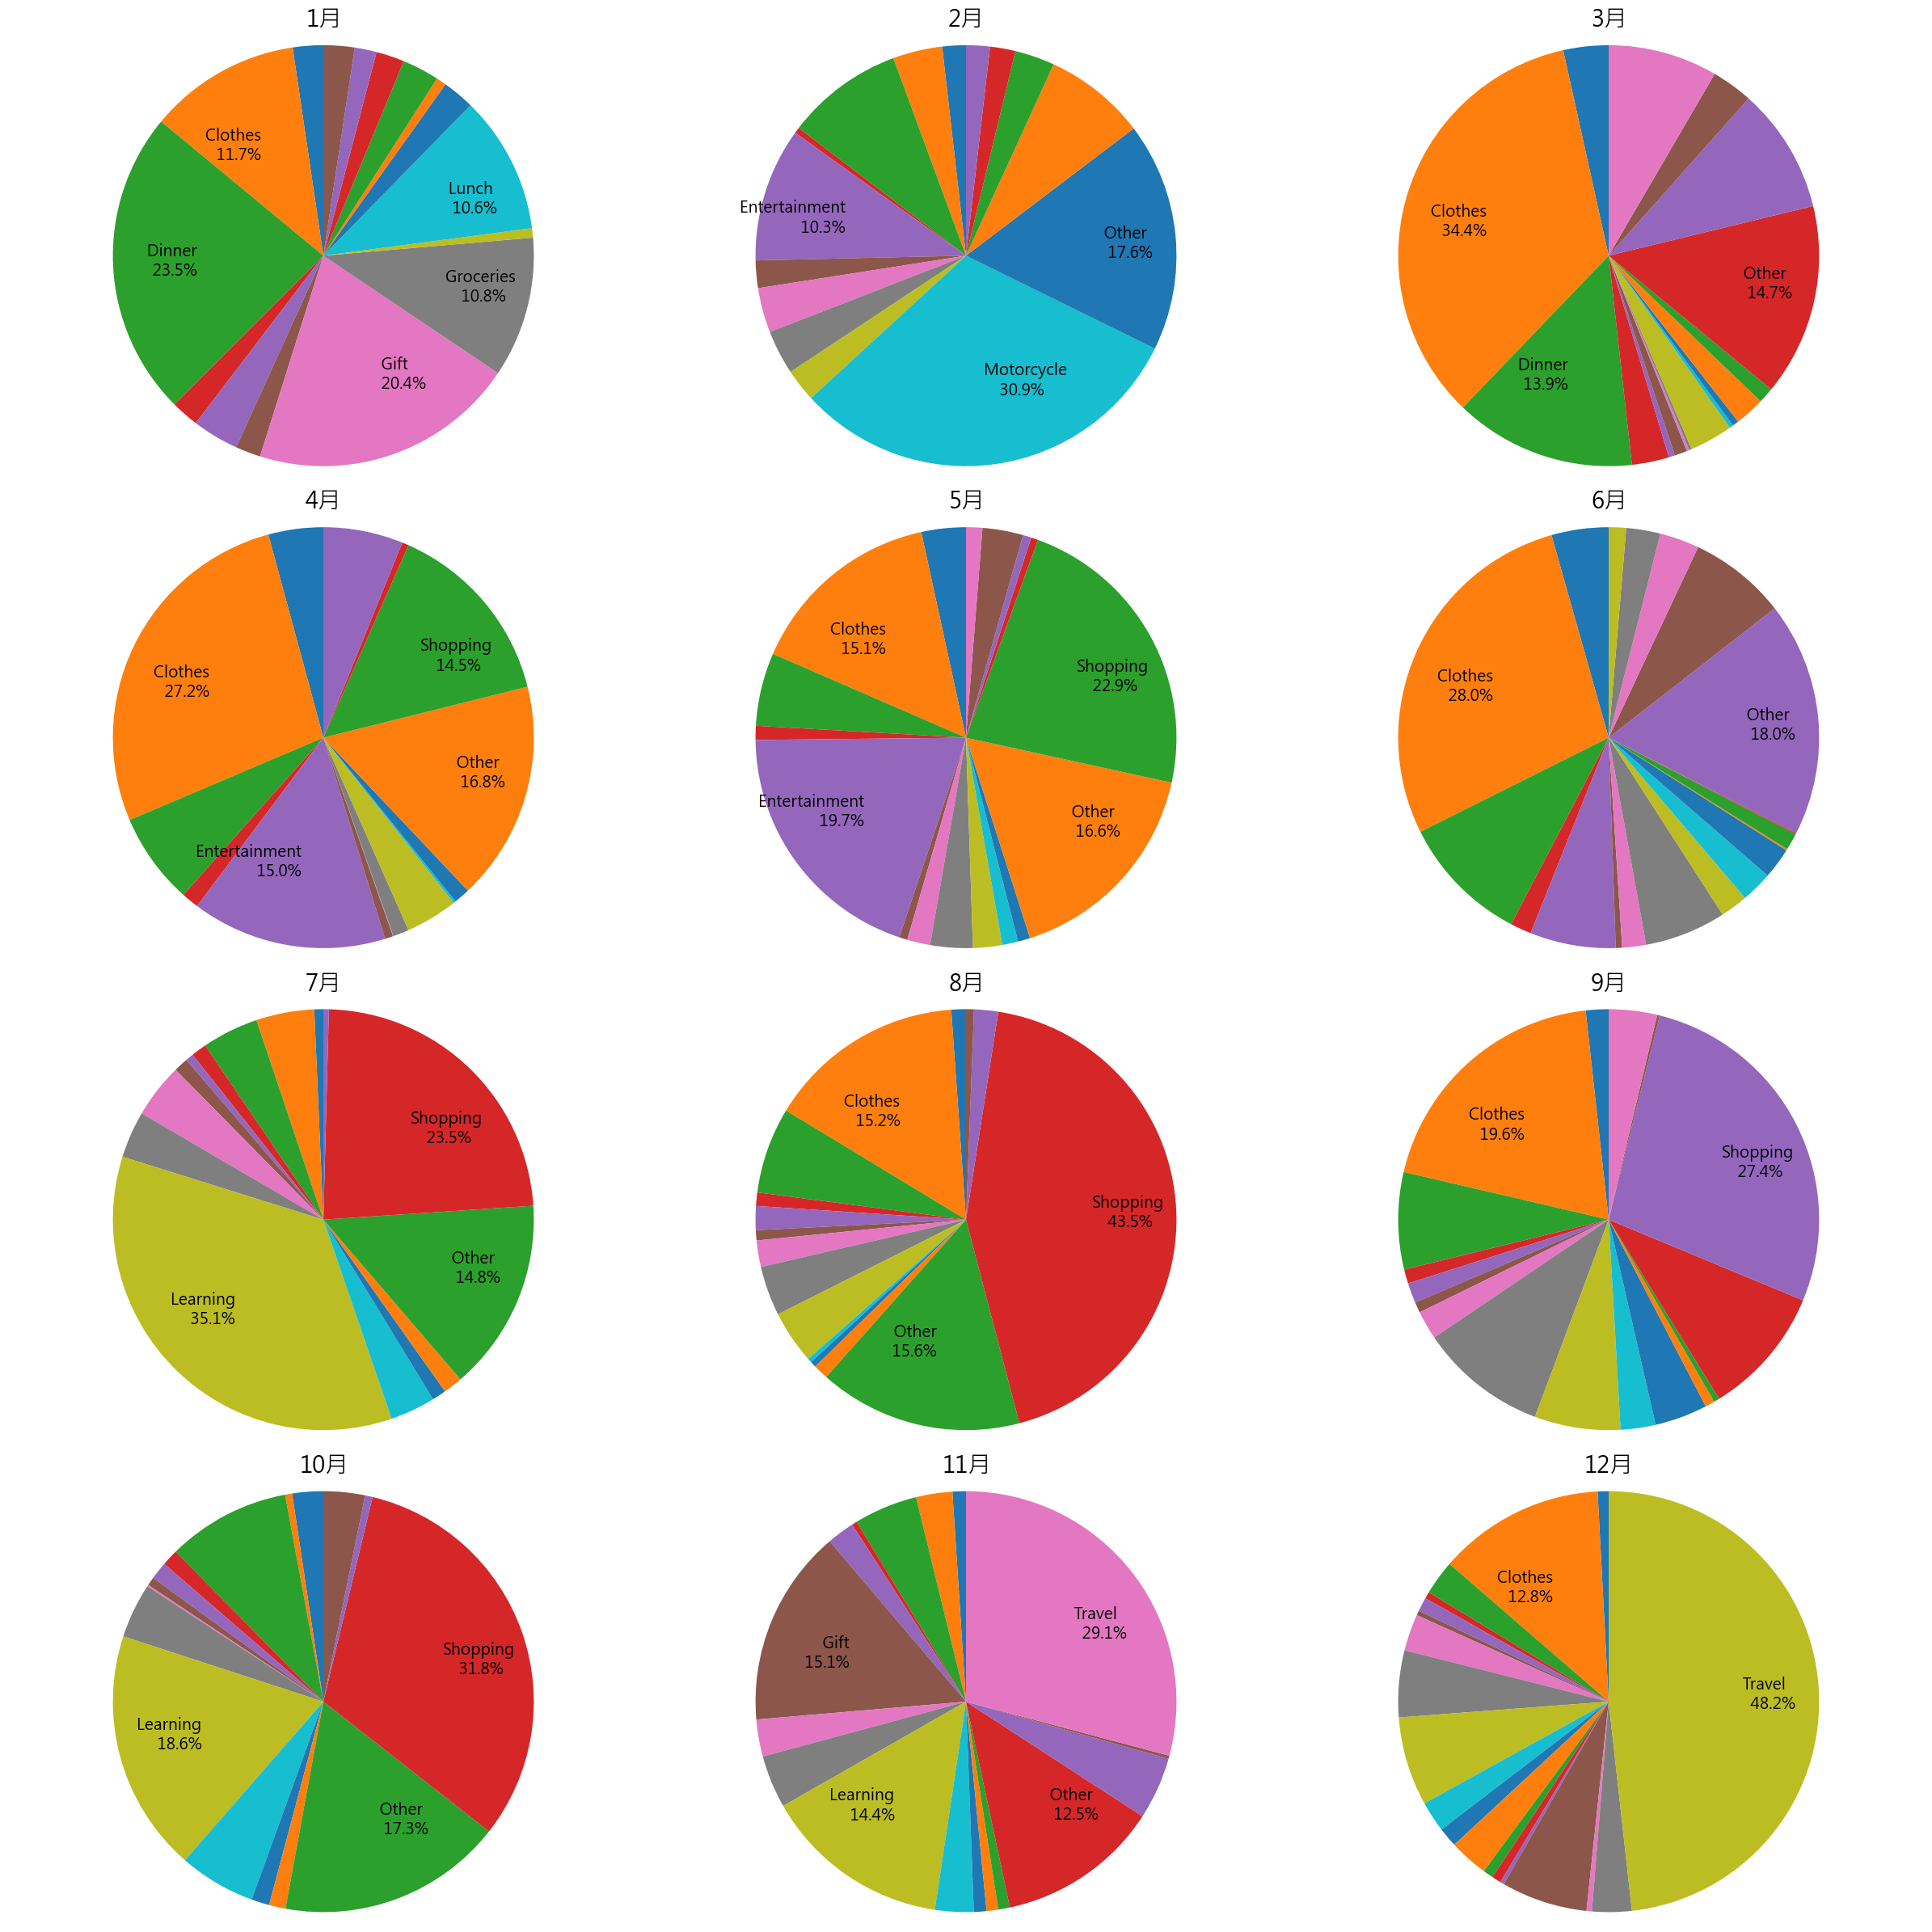

In [18]:
fig, axs = plt.subplots(4, 3, figsize=(24, 24))

for i, ax in enumerate(axs.flat, 1):
    category_grouped = cost[cost['月份'] == i].groupby('類別')[['金額']].agg('sum')

    # 計算占比
    total = category_grouped['金額'].sum()
    percentages = category_grouped['金額'] / total * 100

    # 選擇占比大於等於10%的類別
    labels = [f'{category_grouped.index[i]:>8s}\n{percentages[i]:>8.1f}%' if percentages[i] >= 10 else None for i in range(len(category_grouped.index))]

    # 圓餅圖
    ax.pie(category_grouped['金額'], labels = labels, startangle = 90, labeldistance = 0.6, textprops={'fontsize': 14})
    ax.set_title(f"{i}月", fontsize = 20)
    ax.axis('equal')

plt.tight_layout()
plt.show()

### 年類別圓餅 & 年糕消費類別

In [19]:
# 類別排序
categorysum(cost).sort_values('金額', ascending = False)

,金額
類別,
Shopping,110167
Clothes,92805
Other,79434
Travel,58979
Dinner,47890
Learning,39292
Entertainment,30340
Groceries,24581
Lunch,23171


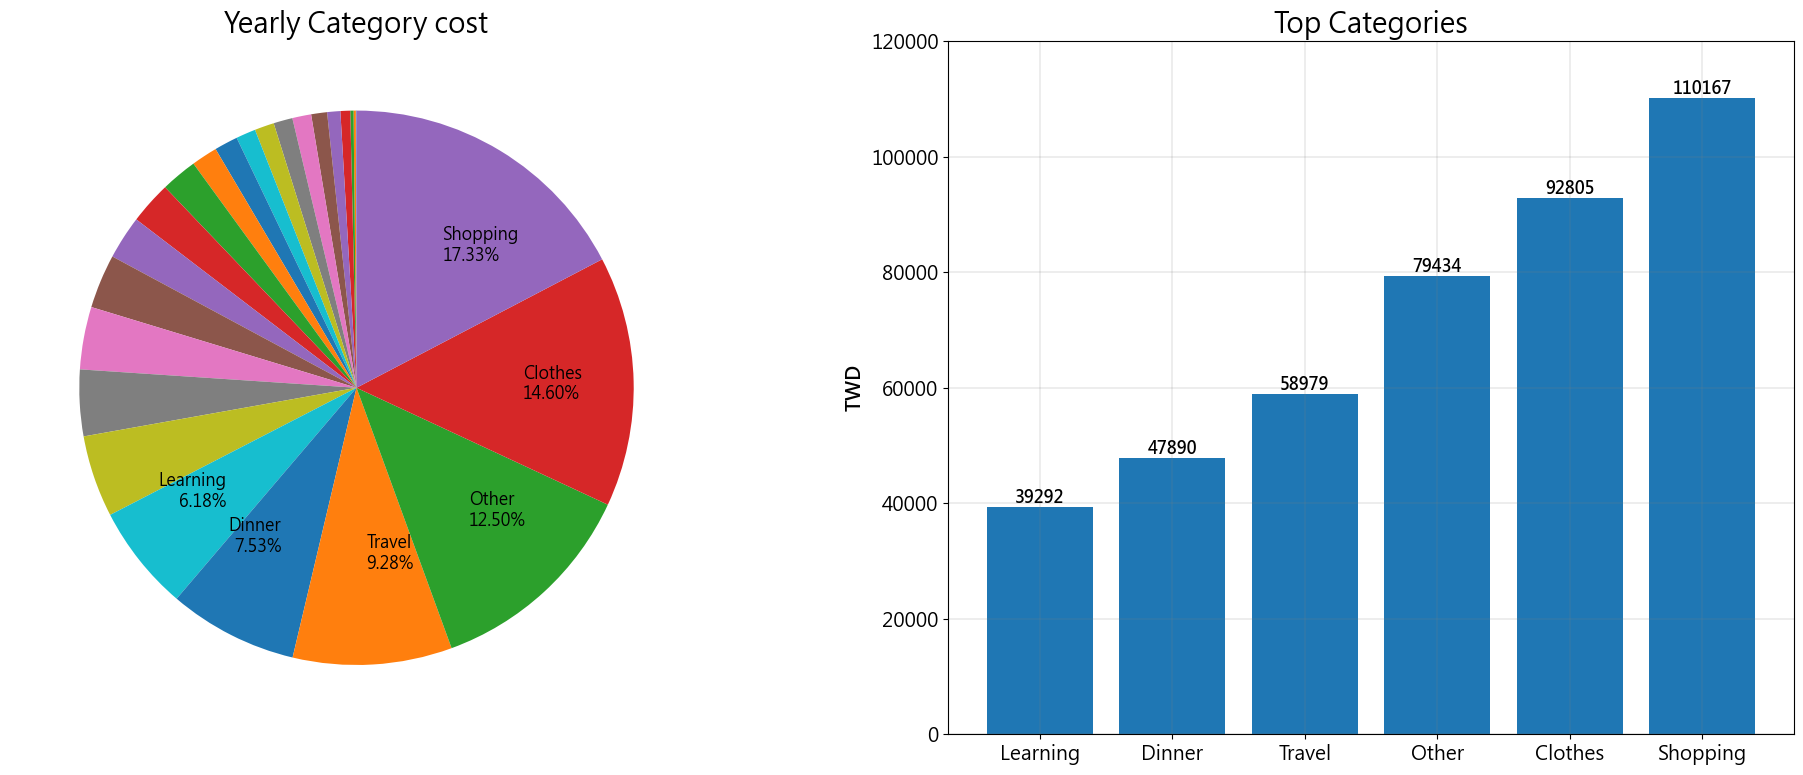

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24, 9))

category_grouped = cost.groupby('類別')[['金額']].sum().sort_values('金額', ascending = True)

# 計算占比
total = category_grouped['金額'].sum()
percentages = category_grouped['金額'] / total *100

# 選擇占比大於等於5%的類別
labels = [f'{category_grouped.index[i]}\n{percentages[i]:.2f}%' if percentages[i] >= 5 else None for i in range(len(category_grouped))]

# 圓餅
ax1.pie(category_grouped['金額'].values, labels = labels, startangle = 90, labeldistance = 0.6, textprops={'fontsize': 12})
ax1.set_title('Yearly Category cost', fontsize = 20)

# bar
top_category = category_grouped[percentages >= 5]
bars = ax2.bar(top_category.index, top_category['金額'])
ax2.set_title('Top Categories', fontsize = 20)
ax2.set_ylabel('TWD', fontsize = 14, fontweight = 'bold')
ax2.set_ylim(0, 120000)
ax2.tick_params('both', labelsize = 14)
ax2.grid(color = 'gray', linewidth = 0.2)

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, height, ha = 'center', va = 'bottom', fontsize = 12, fontweight = 'bold')

plt.show()